In [ ]:
pip install numpy pandas seaborn matplotlib scikit-learn imblearn scipy lightgbm xgboost keras tensorflow shap deslib statsmodels scikit_posthocs orange3==3.30

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 39.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 9.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 26.2 MB/s eta 0:00:0000:0100:01
  Installing build depe

# Cross Validating to find results

In [8]:
from dataHandling import LoadData # Load the both the data set as well as the external validation data set
X,y,X_200,y_200 = LoadData()

In [3]:
from resultFunctions import CrossValidate # Cross validate and gather all results for the specified model
dfTrainResults, dfValResults, df200Results, dfValROC, df200ROC, dfValPR, df200PR, dfValPreds, df200Preds, bestModel, X_val, y_val = CrossValidate('LR', X, y, X_200, y_200) #Cross Validation for Logistic Regression 
 

# Save all results into files

In [4]:
import pandas as pd
from resultFunctions import Predictions
dfValResults = pd.concat([dfValResults, pd.DataFrame(dfValResults.mean()).T.rename(index={0: 'mean'})])  #Find mean for each metric
df200Results = pd.concat([df200Results, pd.DataFrame(df200Results.mean()).T.rename(index={0: 'mean'})]) #Find mean for each metric

dfBestModelLastFoldPreds = pd.DataFrame(columns=['prediction', 'probability', 'actual']) # Create dataframe on last fold for predictions
dfBestModelLastFoldPreds = Predictions(dfBestModelLastFoldPreds, X_val, y_val, bestModel) # Gather results for the prediction plot

dataframes=[dfTrainResults, 
            dfValResults, 
            df200Results, 
            dfValROC, 
            df200ROC, 
            dfValPR, 
            df200PR,
            dfValPreds,
            df200Preds,
            dfBestModelLastFoldPreds] # Creation of a list of all data frames

filenames=['Train_Results',
          'Val_Results',
          '200_Results',
          'Val_ROC',
          '200_ROC',
          'Val_PR',
          '200_PR',
          'ValPreds',
          '200Preds',
          'BestModelLastFoldPreds'] # List of names that all the files should be named

from fileFunctions import SaveFile
SaveFile(dataframes, filenames) #Save all files into current working directory

file Train_Results is saved
file Val_Results is saved
file 200_Results is saved
file Val_ROC is saved
file 200_ROC is saved
file Val_PR is saved
file 200_PR is saved
file ValPreds is saved
file 200Preds is saved
file BestModelLastFoldPreds is saved


In [5]:
from specialistPerformance import SpecialistsResults
dfResults=SpecialistsResults() # Calculate metrics for the specialists 
dfResults.to_pickle('Specialists.pkl')
dfResults

,Specialist 1,Specialist 2,Specialist 3,Specialist 4,Specialist 5,Majority vote
TP,28,31,31,29,31,33
FP,49,54,36,52,51,44
TN,96,94,112,96,97,104
FN,20,18,18,20,18,16
Sensitivity,0.583333,0.632653,0.632653,0.591837,0.632653,0.673469
Specificity,0.662069,0.635135,0.756757,0.648649,0.655405,0.702703
TPR,0.583333,0.632653,0.632653,0.591837,0.632653,0.673469
FPR,0.337931,0.364865,0.243243,0.351351,0.344595,0.297297
Precision,0.363636,0.364706,0.462687,0.358025,0.378049,0.428571
F1,0.448,0.462687,0.534483,0.446154,0.473282,0.52381


# Plots

## Confusion Matrix for the average specialist

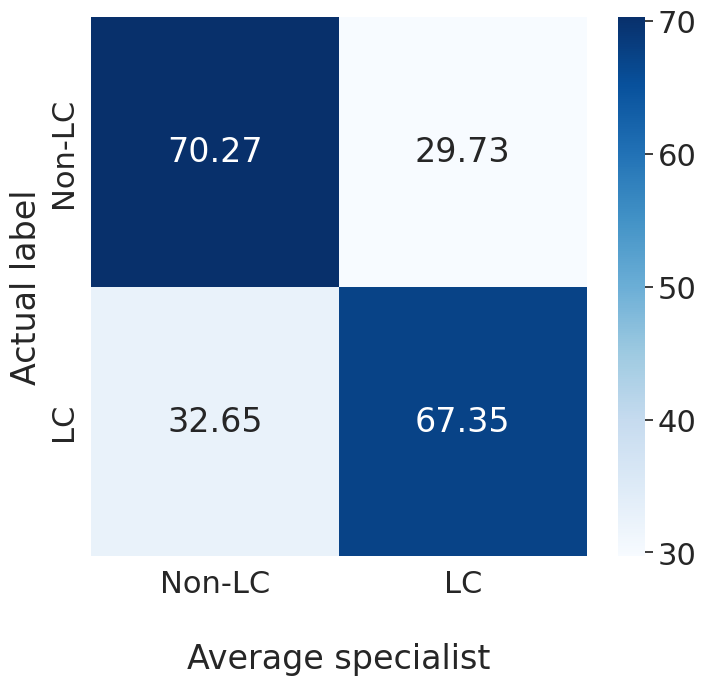

In [1]:
import pandas as pd
from plotFunctions import NormalizedCM_plot
df=pd.read_pickle('Specialists.pkl')
TN = df.loc['TN', 'Majority vote']
FP = df.loc['FP', 'Majority vote']
FN = df.loc['FN', 'Majority vote']
TP = df.loc['TP', 'Majority vote']

NormalizedCM_plot(TN, FP, FN, TP, 'Average specialist', 'CM_specialists') # Plot normalized CM

## Confusion Matrix for validation data

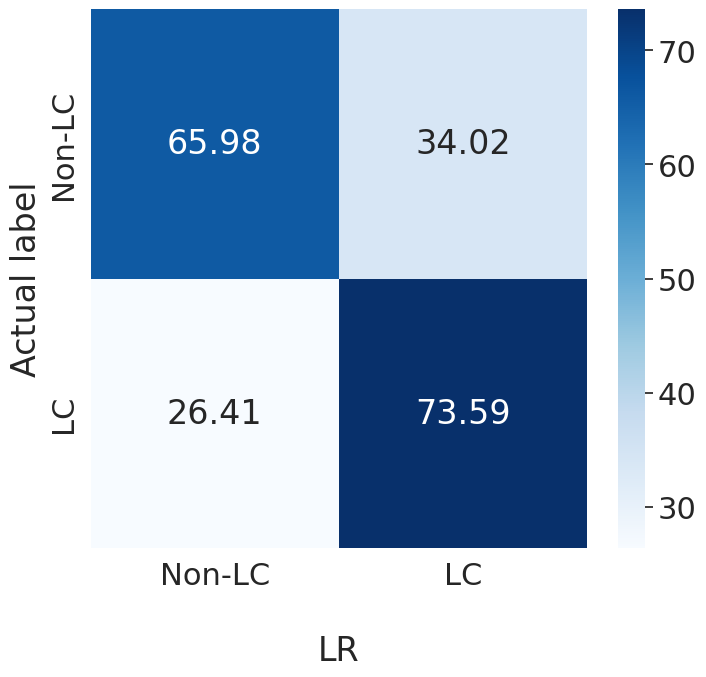

In [9]:
dfValResults=pd.read_pickle('Val_Results.pkl')
TN = dfValResults.loc['mean', 'TN']
FP = dfValResults.loc['mean', 'FP']
FN = dfValResults.loc['mean', 'FN']
TP = dfValResults.loc['mean', 'TP']

NormalizedCM_plot(TN, FP, FN, TP, 'LR', 'CM val LR_model')

## Confusion Matrix for the external validation data set

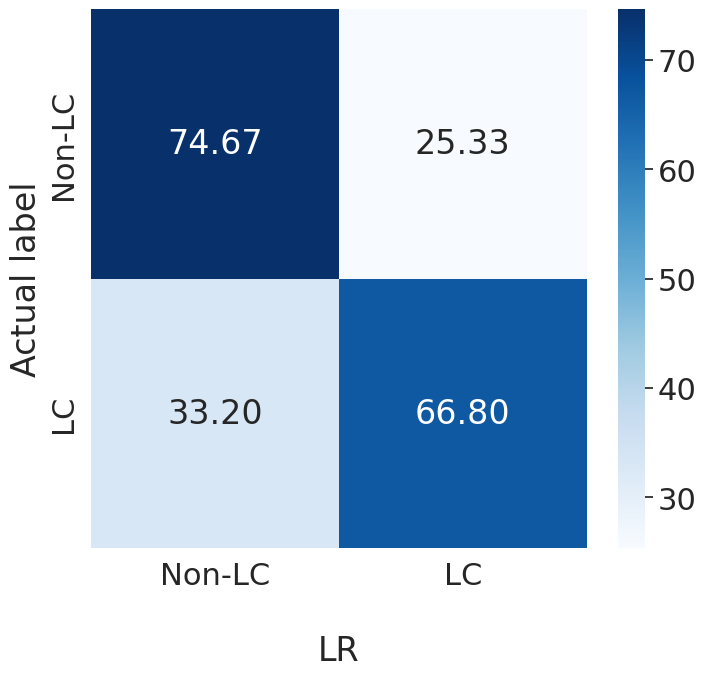

In [10]:
dfValResults=pd.read_pickle('200_Results.pkl')
TN = dfValResults.loc['mean', 'TN']
FP = dfValResults.loc['mean', 'FP']
FN = dfValResults.loc['mean', 'FN']
TP = dfValResults.loc['mean', 'TP']

NormalizedCM_plot(TN, FP, FN, TP, 'LR', 'CM 200 LR_model')

## ROC curve on external validation set to compare with specialists

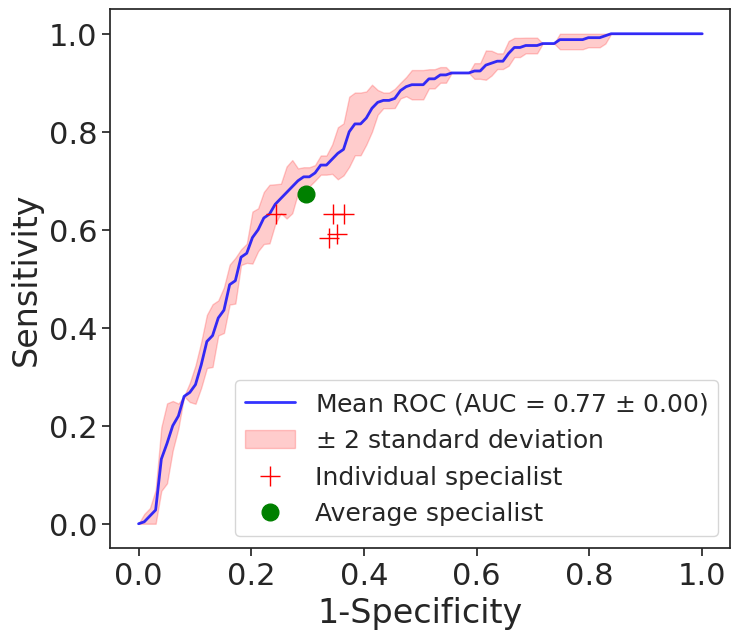

In [12]:
from plotFunctions import ROC_plot
dfROC=pd.read_pickle('200_ROC.pkl')

df=pd.read_pickle('Specialists.pkl')

ROC_plot(dfROC, 'ROC LR_model', df)

/work/Machine Learning Algorithms/Models with Smoking feature/Cleaned code/Code/plotFunctions.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPR['precision'][each] = dfPR['precision'][each][:min_length]
/work/Machine Learning Algorithms/Models with Smoking feature/Cleaned code/Code/plotFunctions.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPR['precision'][each] = dfPR['precision'][each][:min_length]
/work/Machine Learning Algorithms/Models with Smoking feature/Cleaned code/Code/plotFunctions.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

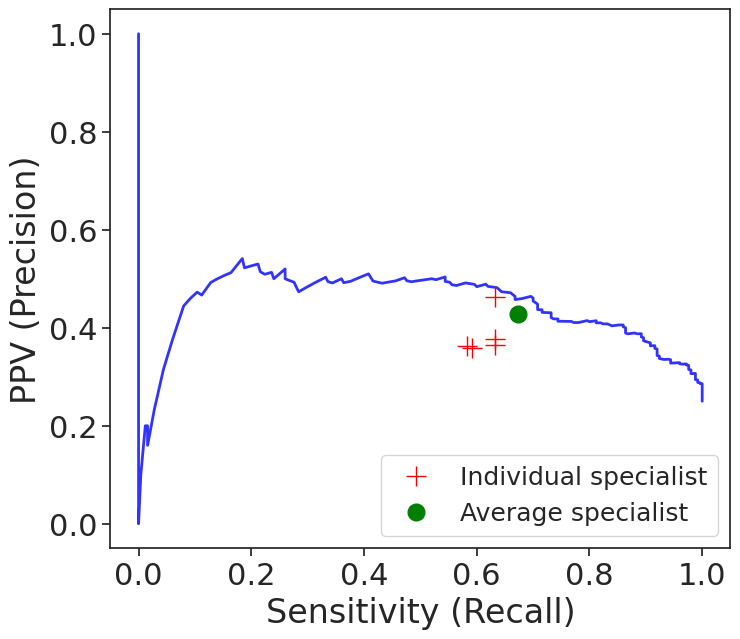

In [13]:
from plotFunctions import PR_plot
dfPR=pd.read_pickle('200_PR.pkl')

df=pd.read_pickle('Specialists.pkl')

PR_plot(dfPR, 'PR LR_model', df)

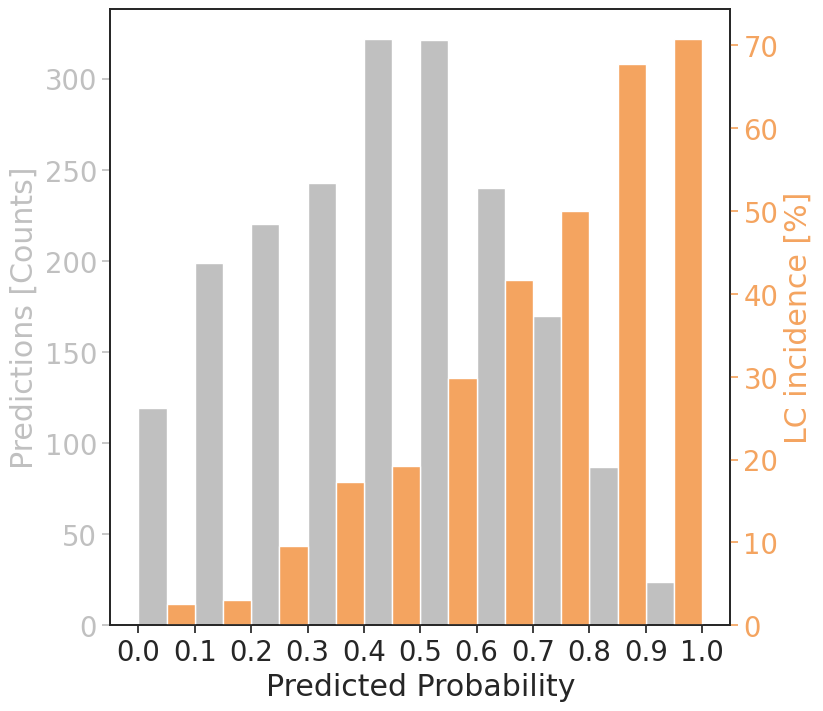

In [14]:
from plotFunctions import Preds_plot
dfpreds=pd.read_pickle('BestModelLastFoldPreds.pkl')

Preds_plot(dfpreds, 'preds_lastFoldBestModel')

## Critical distance plot

Critical distance is: 1.3859038352815105


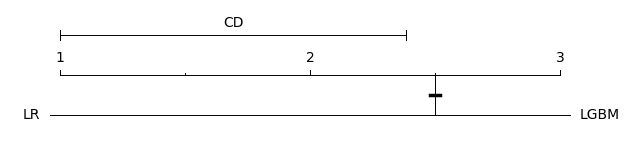

In [3]:
import pandas as pd
from criticalDistanceFunctions import PrepareDataForCD,CalculatePvalues,CriticalDistance_plot

# Load files for all models that should be included in the plot
df=pd.read_pickle('../Val_Results.pkl') 
df2 = pd.read_pickle('../Val_Results_LGBM.pkl')

# Names of models that should be compared in same order as the above dataframes
models=['LR','LGBM']

data, melted = PrepareDataForCD(models, df,df2)
p_values=CalculatePvalues(data, melted)


CriticalDistance_plot(p_values, models, 'cd_plot')